In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra 
import matplotlib.pyplot as plt #data processing
import seaborn as sns #visualization and data processing
import itertools 
path = "datasets/heartdisease/heart.csv"
df = pd.read_csv(path)



In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120923cf8>,
      dtype=object)

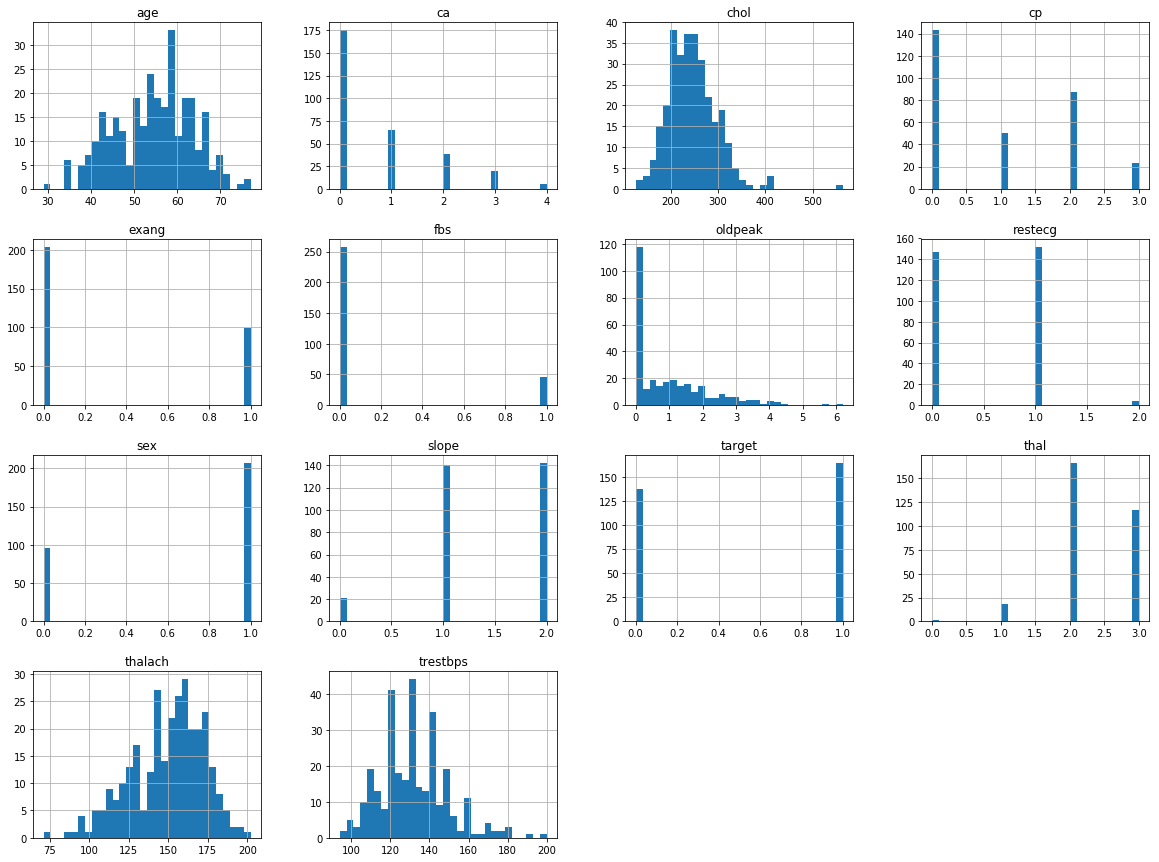

In [4]:
df.hist(bins=30, figsize=(20,15))

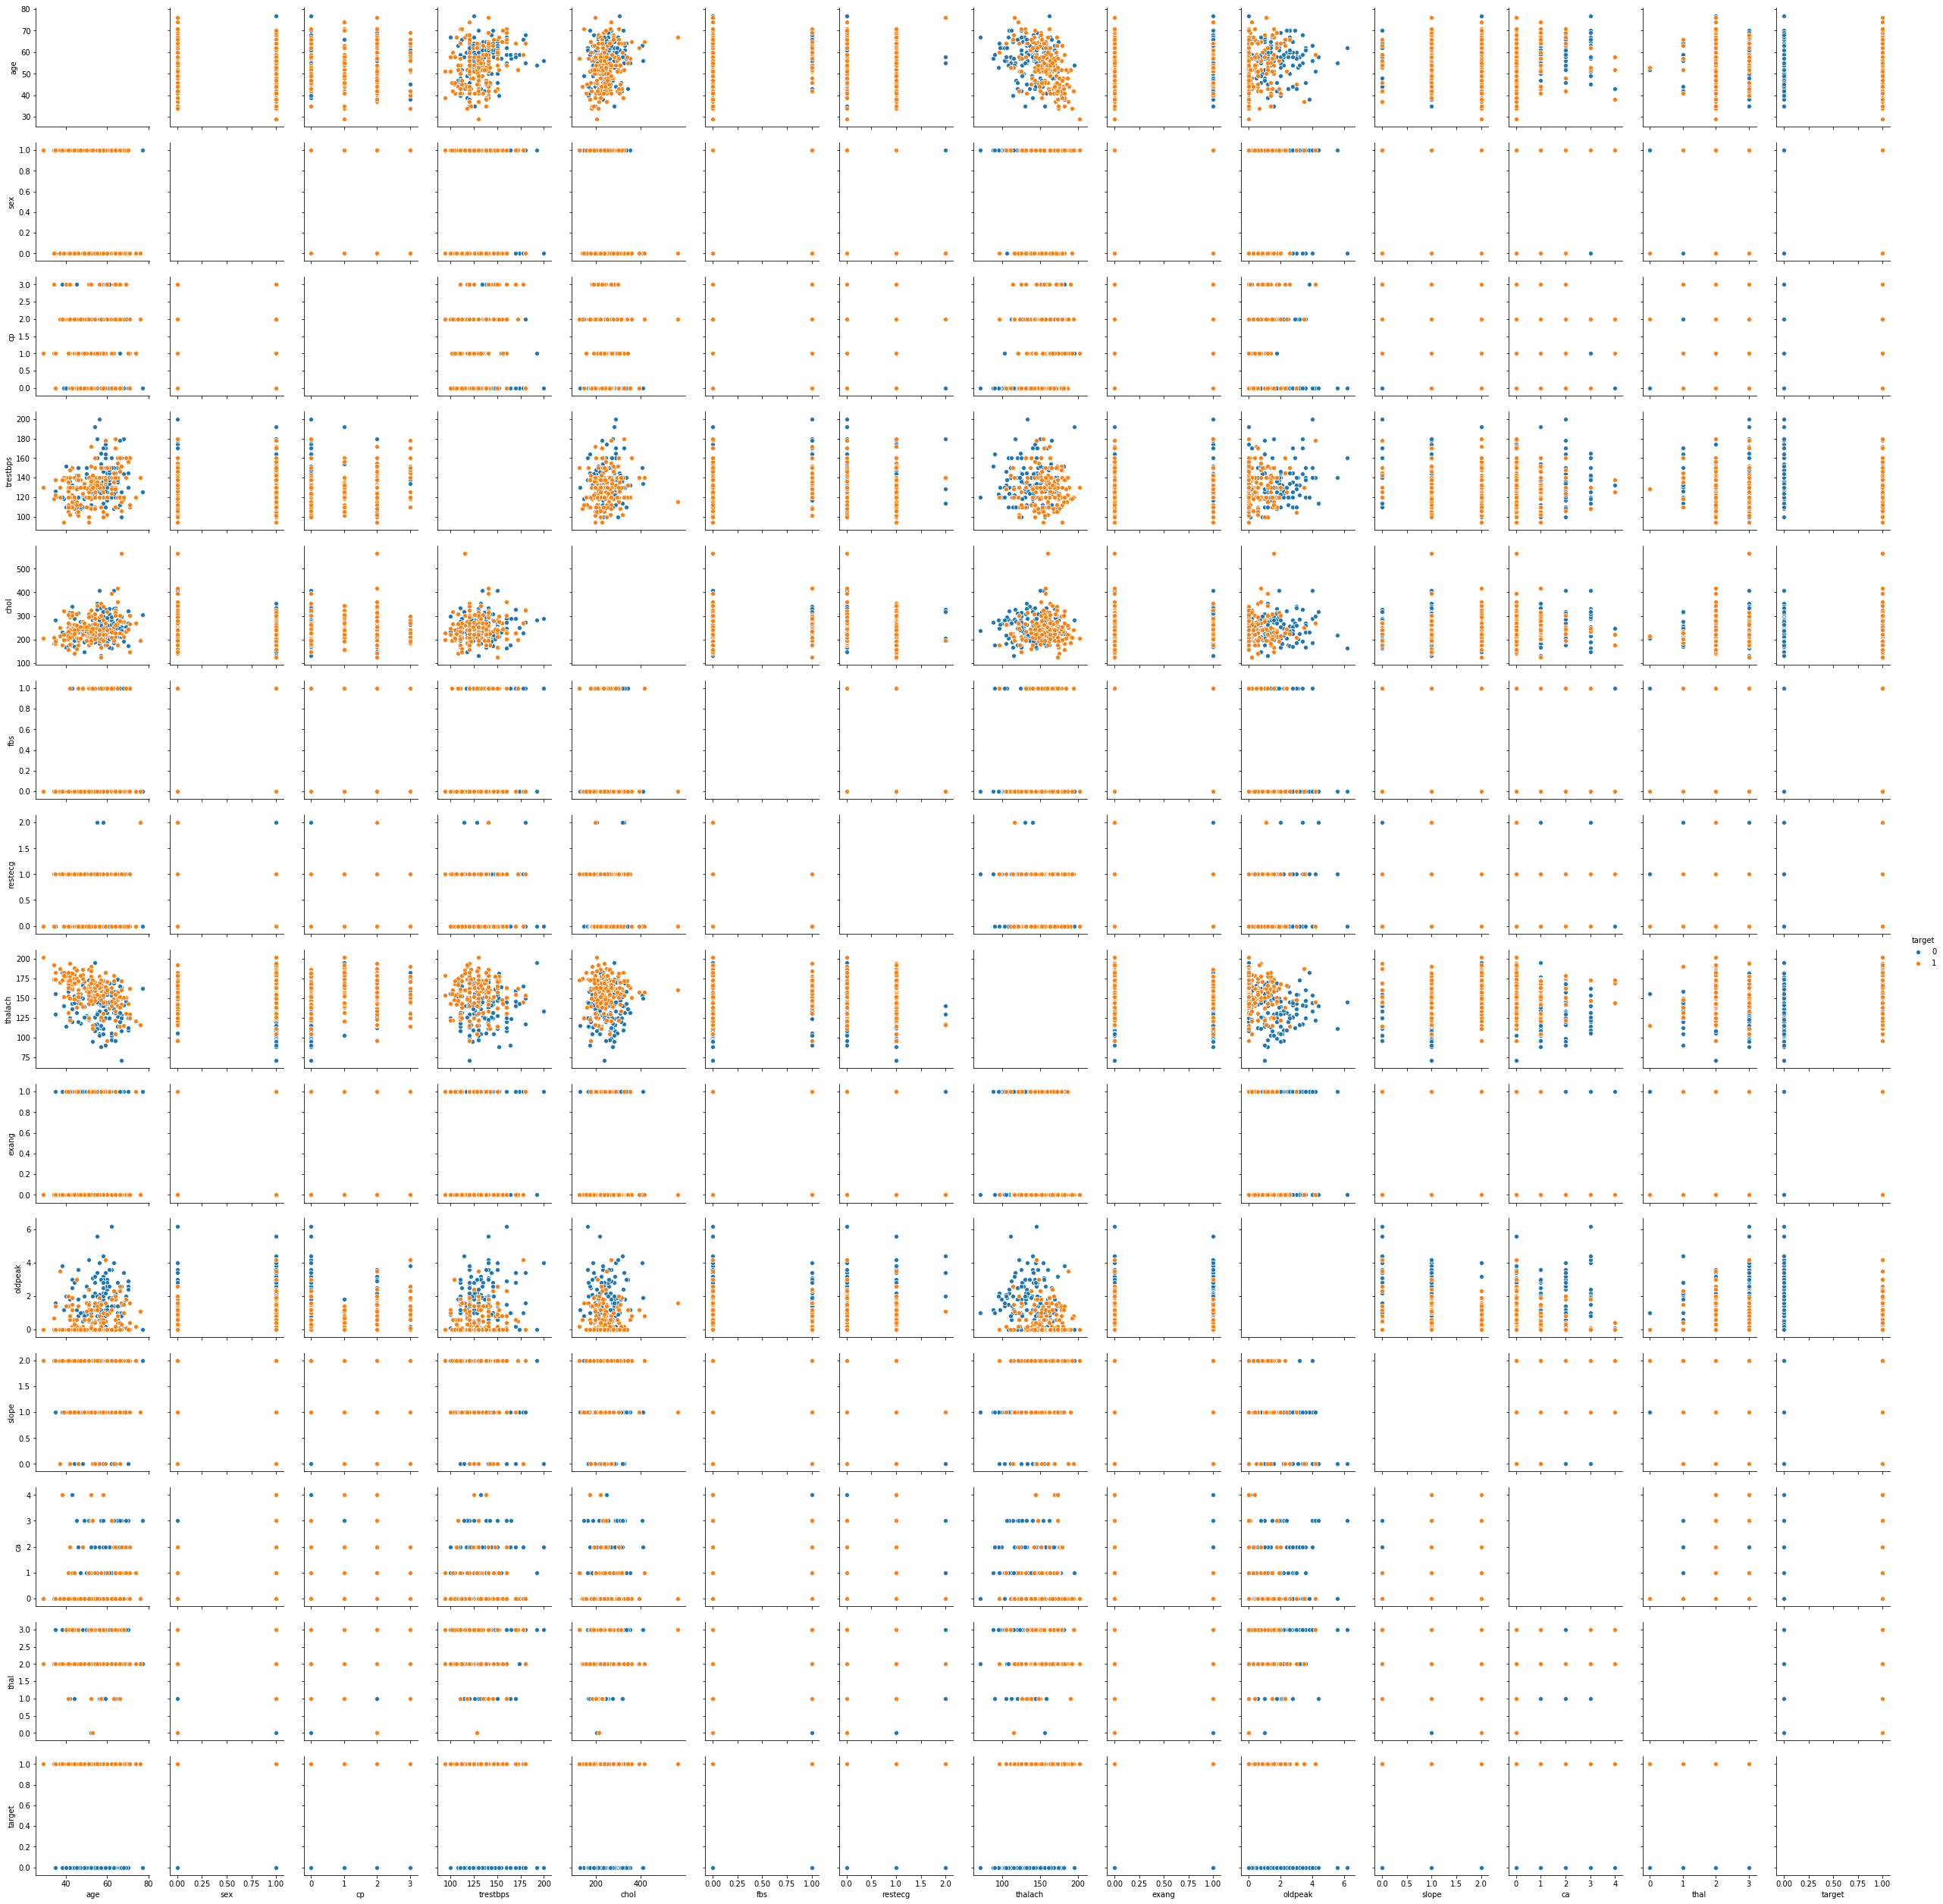

In [5]:
sns.pairplot(data=df, hue='target', diag_kind='scatter')

In [6]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

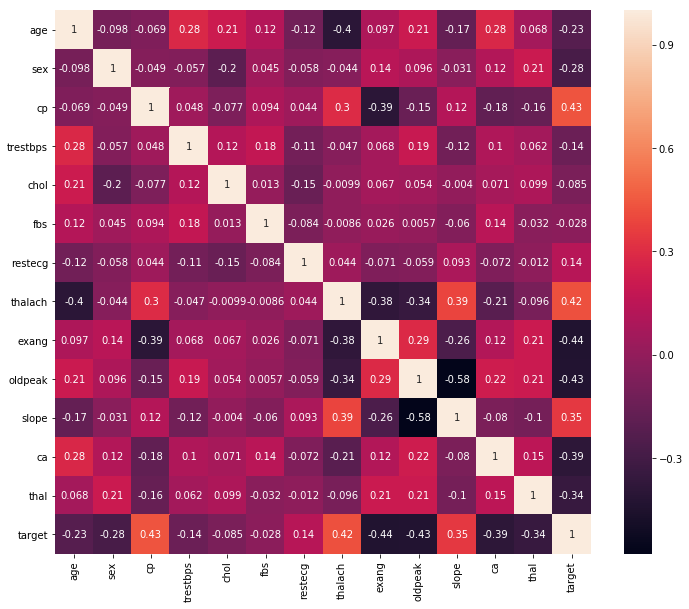

In [7]:
sns.heatmap(df[df.columns[:15]].corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

In [8]:
import sklearn 
from sklearn.model_selection import train_test_split

X = df[df.columns[:13]]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y) 
# stratify the outcome class

In [9]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2


In [10]:
print(len(y_train), 'train +', len(y_test), 'test')

212 train + 91 test


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm #support vector machines
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [12]:
support_v_m_l = svm.SVC(kernel = 'linear')
support_v_m_l.fit(X_train,y_train)
predict_svm_l = support_v_m_l.predict(X_test)
print("The Accuracy on the training set using the linear kernel is: {:.3f}".format(support_v_m_l.score(X_train,y_train)))
print('The support vector machine =', 'linear', 'kernel is', metrics.accuracy_score(predict_svm_l, y_test), 'accurate in predicting diabetes on the testing set')

The Accuracy on the training set using the linear kernel is: 0.835
The support vector machine = linear kernel is 0.8571428571428571 accurate in predicting diabetes on the testing set


In [13]:
support_v_m_r = svm.SVC(kernel = 'rbf', random_state = 0, C = 0.1)
support_v_m_r.fit(X_train,y_train)
predict_svm_r = support_v_m_r.predict(X_test)
print("The Accuracy on the training set using the rbf kernel is: {:.3f}".format(support_v_m_r.score(X_train,y_train)))
print('The support vector machine =', 'radial', 'kernel is', metrics.accuracy_score(predict_svm_r, y_test), 'accurate in predicting diabetes on the testing set')
    

The Accuracy on the training set using the rbf kernel is: 0.542
The support vector machine = radial kernel is 0.5494505494505495 accurate in predicting diabetes on the testing set


In [14]:
logistic_r_m = LogisticRegression(C = 0.1)
logistic_r_m.fit(X_train,y_train)
predict_lr = logistic_r_m.predict(X_test)
print("The Accuracy on the training set using the logistic Regression is: {:.3f}".format(logistic_r_m.score(X_train,y_train)))
print("the logistic regression algorrithm accuracy to predict diabetes on the testing set is", metrics.accuracy_score(predict_lr,y_test))

The Accuracy on the training set using the logistic Regression is: 0.840
the logistic regression algorrithm accuracy to predict diabetes on the testing set is 0.8791208791208791


In [15]:
decision_t_m = DecisionTreeClassifier(random_state = 1, max_depth = 2)
decision_t_m.fit(X_train, y_train)
predict_dt = decision_t_m.predict(X_test)
print("The Accuracy on the training set using the decision tree classifier is: {:.3f}".format(decision_t_m.score(X_train,y_train)))
print("the decision tree model is able to predict diabetes with", metrics.accuracy_score(predict_dt,y_test), "accuracy on the testing set")



The Accuracy on the training set using the decision tree classifier is: 0.769
the decision tree model is able to predict diabetes with 0.7032967032967034 accuracy on the testing set


In [16]:
A = []
classifications = ['Linear Support Vector Machine', 'Radial Support Vector Machine', 'Logistic Regression', 'Decision Tree Model']
algorithms = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf', random_state = 0, C = 0.1), LogisticRegression(C=0.1), DecisionTreeClassifier(random_state = 0, max_depth = 2)]
for i in algorithms:
    algorithm = i 
    algorithm.fit(X_train, y_train)
    algorithm_prediction = algorithm.predict(X_test)
    A.append(metrics.accuracy_score(algorithm_prediction, y_test))
algorithms_dataframe = pd.DataFrame(A, index = classifications)
algorithms_dataframe.columns = ['Accuracy']
algorithms_dataframe



,Accuracy
Linear Support Vector Machine,0.857143
Radial Support Vector Machine,0.549451
Logistic Regression,0.879121
Decision Tree Model,0.703297


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

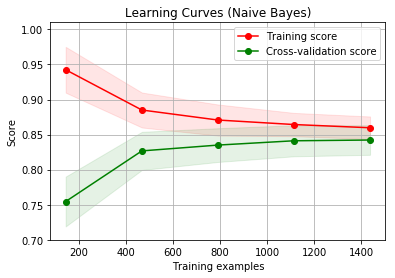

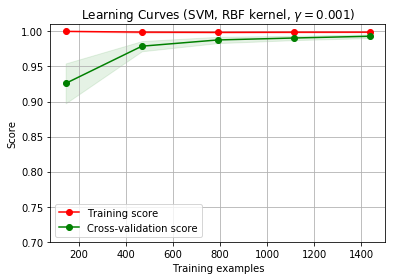

In [19]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()